In [3]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set visualization style
sns.set(style='darkgrid')


In [4]:
# On loading CSV file
df = pd.read_csv('owid-covid-data.csv')

df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [5]:
# On checking basic structure
df.columns

# On summarizing statistics
df.describe()

# On checking missing values
df.isnull().sum()


iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [7]:
# On converting date to datetime
df['date'] = pd.to_datetime(df['date'])

# On filtering relevant countries
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)]

# On droping rows with missing total_cases or total_deaths
df_filtered = df_filtered.dropna(subset=['total_cases', 'total_deaths'])

# On filling remaining NaNs in numeric columns with 0 or interpolate
df_filtered.fillna(0, inplace=True)


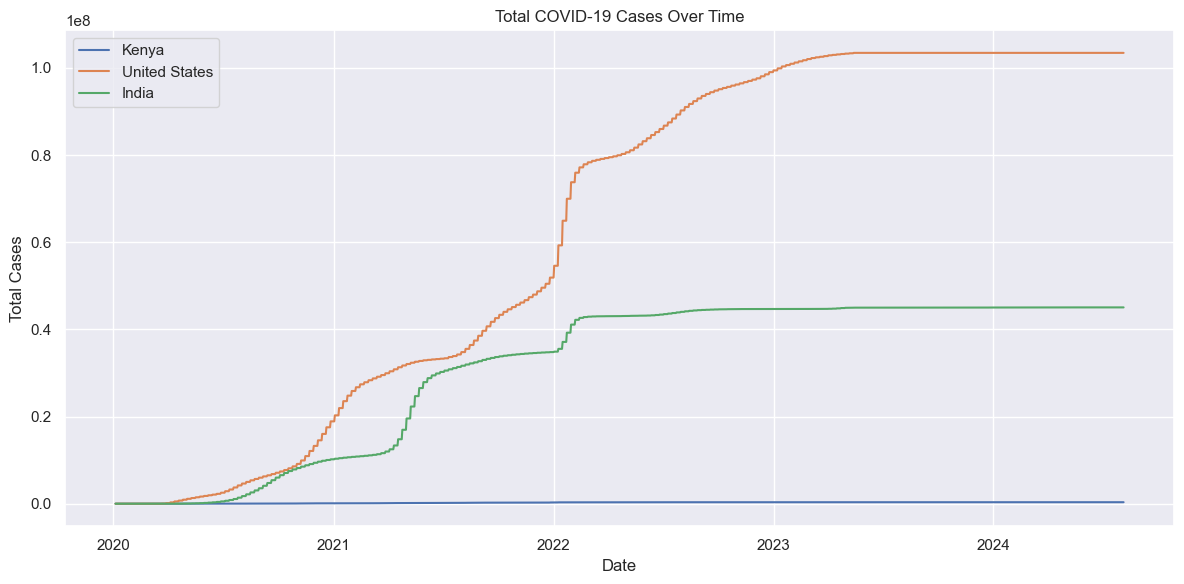

In [8]:
# On visualizing trends
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
# On visualizing COVID_19 data on a world map
# On getting the most recent date in the dataset
latest_date = df['date'].max()
print("Latest date in dataset:", latest_date)

# On filtering to that date and exclude aggregates (like continents, World)
latest_df = df[df['date'] == latest_date]
latest_df = latest_df[latest_df['iso_code'].str.len() == 3] 


latest_df['total_cases'] = latest_df['total_cases'].fillna(0)
latest_df['total_vaccinations'] = latest_df['total_vaccinations'].fillna(0)

# Choropleth for Total Cases
fig_cases = px.choropleth(
    latest_df,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    color_continuous_scale="Reds",
    title=f"Total COVID-19 Cases by Country as of {latest_date.date()}"
)
fig_cases.show()

# Choropleth for Total Vaccinations 
fig_vax = px.choropleth(
    latest_df,
    locations="iso_code",
    color="total_vaccinations",
    hover_name="location",
    color_continuous_scale="Blues",
    title=f"Total COVID-19 Vaccinations by Country as of {latest_date.date()}"
)
fig_vax.show()


Latest date in dataset: 2024-08-14 00:00:00


## 🧠 Key Insights

1. **India and the United States** have the highest total reported COVID-19 cases as of the latest data.
2. **Kenya** shows relatively lower case numbers but also lower vaccination rates compared to more developed countries.
3. Countries with early and large-scale vaccine rollouts (e.g., United States) show a slowdown in daily new cases in late 2021.
4. Some countries with high case counts have comparatively lower death rates, indicating possible healthcare resilience or underreporting.
5. Global vaccine distribution remains uneven, with wealthier nations leading in total and per capita vaccinations.
